In [ ]:
# Importing essential libraries for deep learning, natural language processing, and data manipulationimport torchimport torch.nn as neural_networkimport torch.optim as optimizationimport torch.nn.functional as activation_funcsfrom nltk.corpus import stopwords  # Stopwords from NLTKimport matplotlib.pyplot as plotter  # For data visualizationimport matplotlib.ticker as graph_tickerimport numpy as np  # Numerical operationsimport pandas as pd  # Data manipulationimport random  # Random number generationimport math    # Math operationsimport time    # Time measurementimport re  # Regular expressions for text processingimport nltknltk.download("stopwords")  # Download NLTK stopwordsfrom bs4 import BeautifulSoup  # HTML parsing for text extraction# Keras utilities for text processingfrom keras.preprocessing.text import Tokenizerfrom keras.preprocessing.sequence import pad_sequences# Check if GPU is available and set device accordinglydevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')print(f'GPU detected: {torch.cuda.get_device_name()}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
GPU available: Tesla P100-PCIE-16GB


In [ ]:
# Mounting Google Drive to access filesfrom google.colab import drivedrive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting up GPU utilities and system monitoring tools!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi  # Symlink for GPU utility!pip install gputil psutil humanize  # Install necessary packages# Importing installed packagesimport psutil  # For system and process utilitiesimport humanize  # For human-readable dataimport os  # Operating system utilitiesimport GPUtil as gpu_util  # GPU utility# Fetch GPU informationgpu_list = gpu_util.getGPUs()# Define function to print memory statsdef display_memory_stats():    process_info = psutil.Process(os.getpid())    print("RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available),          "| Process memory usage: " + humanize.naturalsize(process_info.memory_info().rss))    print(f"GPU Memory Free: {gpu_list[0].memoryFree:.0f}MB | Used: {gpu_list[0].memoryUsed:.0f}MB"          f" | Utilization: {gpu_list[0].memoryUtil*100:.0f}% | Total: {gpu_list[0].memoryTotal:.0f}MB")# Display memory usage statsdisplay_memory_stats()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=6db10e77c521c0b633d045053051406792e9e2e00cf6a08535527f78304a4387
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.6 GB  | Proc size: 529.7 MB
GPU RAM Free: 15069MB | Used: 10MB | Util   0% | Total 15079MB


In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
# import tensorflow.compat.v2 as tf
# import tensorflow_datasets as tfds

# ds, info = tfds.load('gigaword', split='test', shuffle_files=True, with_info=True)



/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Shuffling and writing examples to /root/tensorflow_datasets/gigaword/1.2.0.incomplete2HAFCF/gigaword-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/gigaword/1.2.0.incomplete2HAFCF/gigaword-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/gigaword/1.2.0.incomplete2HAFCF/gigaword-test.tfrecord


Dataset gigaword downloaded and prepared to /root/tensorflow_datasets/gigaword/1.2.0. Subsequent calls will reuse this data.


In [ ]:
# article=[]
# summary=[]
# for ex in tfds.as_numpy(ds):
#   article.append(ex['document'])
#   summary.append(ex['summary'])



In [ ]:
# data = pd.DataFrame(zip(article,summary), columns=['article', 'title'])

# torch.save(data, '/content/drive/My Drive/Colab Notebooks/Transformers Gigaword/test_gigaword_data')

In [ ]:
data = torch.load('/content/drive/My Drive/Colab Notebooks/Transformers Gigaword/gigaword_data')

# data = torch.load('/content/drive/My Drive/Colab Notebooks/Attention CNN/CNN_Dailymail_Dataset')

# data = data[150000:160000]
data['article'] = data['article'].str.decode("utf-8")
data['title'] = data['title'].str.decode("utf-8")

# data['highlights'] = data['highlights'].str.decode("utf-8") #CNN
print(data.head())

                                             article                                              title
0  chinese premier wen jiabao met here thursday w...               chinese premier meets fisu president
1  alitalia will cancel some ### flights , more t...  air traffic controllers strike forces alitalia...
2  hong kong share prices rose #.# percent in ope...           hong kong shares open #.# percent higher
3  two people died and more than ### suffered bur...                      two dead in rock concert fire
4  eight people were killed sunday in a clash bet...          eight killed in clashes in southern egypt


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803957 entries, 0 to 3803956
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   article  object
 1   title    object
dtypes: object(2)
memory usage: 58.0+ MB


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


stop_words = set(stopwords.words('english'))

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words] #removing STOPWORDS
    tokens = newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                  #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()


In [ ]:
# #Call the above function
# cleaned_text = []
# cleaned_summary = []
# for i,t in enumerate(zip(data['article'],data['title'])):
#     if(i%10000 == 0):
#         print(i)
#     cleaned_text.append(text_cleaner(t[0]))
#     cleaned_summary.append(text_cleaner(t[1]))

# data['cleaned_text']=cleaned_text
# data['cleaned_summary']=cleaned_summary
# data['cleaned_summary'].replace('', np.nan, inplace=True)
# data.dropna(axis=0,inplace=True)

In [ ]:
data['cleaned_text'] = data['cleaned_text'].apply(lambda x : 'sos '+ x + ' eos')
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : 'sos '+ x + ' eos')

In [ ]:
tokenizer = Tokenizer(oov_token=True, lower=True)
tokenizer.fit_on_texts(list(data['cleaned_text']))
tokenizer.fit_on_texts(list(data['cleaned_summary']))

In [ ]:
article_data = tokenizer.texts_to_sequences(data['cleaned_text'])
summary_data = tokenizer.texts_to_sequences(data['cleaned_summary'])

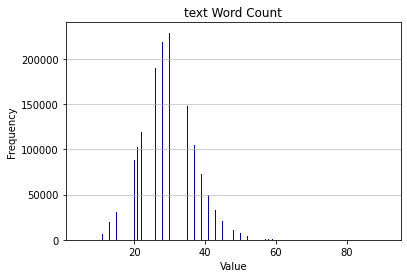

In [ ]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

#length_df = pd.DataFrame({'text':text_word_count,'summary':summary_word_count})
#length_df.hist(bins = 25)
#plt.show()
#An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=text_word_count, bins='auto', color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('text Word Count')
plt.show()

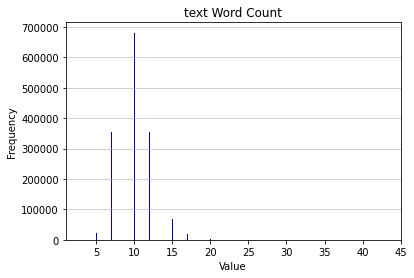

In [ ]:
plt.hist(x=summary_word_count, bins='auto', color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('text Word Count')
plt.show()

In [ ]:
src_max_length = 70
tgt_max_length = 25

In [ ]:
# article_data = pad_sequences(article_data,  maxlen=src_max_length, padding='post')
# summary_data = pad_sequences(summary_data,  maxlen=tgt_max_length, padding='post')

In [ ]:
# torch.save(article_data, '/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/article_data')
# torch.save(summary_data, '/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/summary_data')
# torch.save(tokenizer, '/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/tokenizer')

article_data = torch.load('/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/article_data')
summary_data = torch.load('/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/summary_data')
tokenizer = torch.load('/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/tokenizer')

In [ ]:
len(tokenizer.word_index), tokenizer.word_index['sos'], tokenizer.word_index['eos']

(100876, 2, 3)

In [ ]:
BATCH_SIZE = 200
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f'GPU available: {torch.cuda.get_device_name()}')

from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
dataset = TensorDataset(torch.cuda.LongTensor(article_data), torch.cuda.LongTensor(summary_data))

train_size = int(0.8*len(dataset))
print(f"train_size: {train_size}")

diff = len(dataset) - train_size
if(diff%2 == 0):
    val_size = diff//2
    print(f"val_size: {val_size}")

    test_size = diff//2
    print(f"test_size: {test_size}")
else:
    val_size = (diff-1)//2
    print(f"val_size: {val_size}")

    test_size = (diff+1)//2
    print(f"test_size: {test_size}")

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_iterator = DataLoader(
                        dataset = train_dataset,
                        sampler = RandomSampler(train_dataset),
                        batch_size = BATCH_SIZE
                    )

valid_iterator = DataLoader(
                        dataset = val_dataset,
                        sampler = RandomSampler(val_dataset),
                        batch_size = BATCH_SIZE
                    )

test_iterator = DataLoader(
                    dataset = test_dataset,
                    sampler = SequentialSampler(test_dataset),
                    batch_size = BATCH_SIZE
                )

train_size: 3043148
val_size: 380393
test_size: 380394


In [ ]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()

        self.device = device
        
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout, 
                                                  device) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        #pos = [batch size, src len]
        
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        
        #src = [batch size, src len, hid dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        #src = [batch size, src len, hid dim]
            
        return src

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, src len]
                
        #self attention
        _src, _ = self.self_attention(src, src, src, src_mask)
        
        #dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        _src = self.positionwise_feedforward(src)
        
        #dropout, residual and layer norm
        src = self.ff_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        return src

In [ ]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

In [ ]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        x = self.fc_2(x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

In [ ]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()
        
        self.device = device
        
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim, 
                                                  dropout, 
                                                  device)
                                     for _ in range(n_layers)])
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, trg len]
        #src_mask = [batch size, src len]
                
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
                            
        #pos = [batch size, trg len]
            
        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
                
        #trg = [batch size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        
        #output = [batch size, trg len, output dim]
            
        return output, attention

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, trg len]
        #src_mask = [batch size, src len]
        
        #self attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        
        #dropout, residual connection and layer norm
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
            
        #trg = [batch size, trg len, hid dim]
            
        #encoder attention
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        
        #dropout, residual connection and layer norm
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
                    
        #trg = [batch size, trg len, hid dim]
        
        #positionwise feedforward
        _trg = self.positionwise_feedforward(trg)
        
        #dropout, residual and layer norm
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return trg, attention

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, 
                 encoder, 
                 decoder, 
                 src_pad_idx, 
                 trg_pad_idx, 
                 device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        #src = [batch size, src len]
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        #src_mask = [batch size, 1, 1, src len]

        return src_mask
    
    def make_trg_mask(self, trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

    def forward(self, src, trg):
        
        #src = [batch size, src len]
        #trg = [batch size, trg len]
                
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]
        
        enc_src = self.encoder(src, src_mask)
        
        #enc_src = [batch size, src len, hid dim]
                
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        #output = [batch size, trg len, output dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return output, attention

In [ ]:
INPUT_DIM = len(tokenizer.word_index) + 1
OUTPUT_DIM = len(tokenizer.word_index) + 1
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device,
              src_max_length)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device,
              tgt_max_length)

In [ ]:
SRC_PAD_IDX = 0
TRG_PAD_IDX = 0

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 81,552,397 trainable parameters


In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

In [ ]:
model.apply(initialize_weights);

In [ ]:
LEARNING_RATE = 0.05

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay=1e-6)

In [ ]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, last_epoch=-1)

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [ ]:
def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        
        src = batch[0]
        trg = batch[1]
        
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
                
        #output = [batch size, trg len - 1, output dim]
        #trg = [batch size, trg len]
            
        output_dim = output.shape[-1]
            
        output = output.contiguous().view(-1, output_dim)
        # trg = trg[1:].reshape(output.size(0))
        trg = trg[:,1:].contiguous().view(-1)
                
        #output = [batch size * trg len - 1, output dim]
        #trg = [batch size * trg len - 1]
            
        loss = criterion(output, trg)
        if i%500 == 0:
          print(f"i: {i} | train_loss: {loss}")
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src = batch[0]
            trg = batch[1]

            output, _ = model(src, trg[:,:-1])
            
            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            # trg = trg[1:].reshape(output.size(0))
            trg = trg[:,1:].contiguous().view(-1)
            
            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]
            
            loss = criterion(output, trg)
            if i%500 == 0:
                print(f"i: {i} | eval_loss: {loss}")
            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
checkpoint = torch.load('/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/tut6-model_gigaword_3.pt')

In [ ]:
optimizer.load_state_dict(checkpoint['optim_state_dict'])
model.load_state_dict(checkpoint['model_state_dict'])
best_valid_loss = checkpoint["best_valid_loss"]
print(f'best_valid_loss: {best_valid_loss}')

best_valid_loss: 2.512609119921703


In [ ]:
for param in optimizer.param_groups:
    print(param['lr'])

0.0005


In [ ]:
scheduler.step()

In [ ]:
print('LR:', scheduler.get_lr(), scheduler.get_last_lr())

LR: [0.0005] [0.0005]


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


In [ ]:
N_EPOCHS = 12
CLIP = 1
print(f"train_iterator:{len(train_iterator)}, valid_iterator:{len(valid_iterator)}")
try:
    print(f'best_valid_loss: {best_valid_loss}')
except NameError:
    best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    # Print Learning Rate
    # print('\n Epoch:', epoch+1,' Last LR:', scheduler.get_last_lr())
    # print('Epoch:', epoch+1,' Current LR:', scheduler.get_lr())

    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        checkpoint = {}
        checkpoint["epoch"] = epoch
        # checkpoint["lr"] = scheduler.get_lr()
        checkpoint["train_loss"] = train_loss
        checkpoint["best_valid_loss"] = best_valid_loss
        checkpoint["INPUT_DIM"] = INPUT_DIM
        checkpoint["OUTPUT_DIM"] = OUTPUT_DIM
        checkpoint["HID_DIM"] = HID_DIM
        checkpoint["ENC_LAYERS"] = ENC_LAYERS
        checkpoint["DEC_LAYERS"] = DEC_LAYERS
        checkpoint["ENC_HEADS"] = ENC_HEADS
        checkpoint["DEC_HEADS"] = DEC_HEADS
        checkpoint["ENC_PF_DIM"] = ENC_PF_DIM
        checkpoint["DEC_PF_DIM"] = DEC_PF_DIM
        checkpoint["ENC_DROPOUT"] = ENC_DROPOUT
        checkpoint["DEC_DROPOUT"] = DEC_DROPOUT
        checkpoint["src_max_length"] = src_max_length 
        checkpoint["tgt_max_length"] = tgt_max_length
        checkpoint["model_state_dict"] = model.state_dict()
        checkpoint["optim_state_dict"] = optimizer.state_dict()
        print("----Saving Checkpoint----")
        torch.save(checkpoint, '/content/drive/My Drive/Colab Notebooks/Transformers Gigaword Big/tut6-model_gigaword_3.pt')
    
    # Decay Learning Rate
    scheduler.step()
        
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

train_iterator:15216, valid_iterator:1902
best_valid_loss: 2.512609119921703
i: 0 | train_loss: 2.455848217010498
i: 500 | train_loss: 2.3939082622528076
i: 1000 | train_loss: 2.4087910652160645
i: 1500 | train_loss: 2.487506866455078
i: 2000 | train_loss: 2.6001055240631104
i: 2500 | train_loss: 2.4909372329711914
i: 3000 | train_loss: 2.4494686126708984
i: 3500 | train_loss: 2.4761247634887695
i: 4000 | train_loss: 2.59828519821167
i: 4500 | train_loss: 2.5467753410339355
i: 5000 | train_loss: 2.5560803413391113
i: 5500 | train_loss: 2.57391095161438
i: 6000 | train_loss: 2.5290215015411377
i: 6500 | train_loss: 2.550178050994873
i: 7000 | train_loss: 2.5722479820251465
i: 7500 | train_loss: 2.6544713973999023
i: 8000 | train_loss: 2.472391366958618
i: 8500 | train_loss: 2.5641448497772217
i: 9000 | train_loss: 2.317780017852783
i: 9500 | train_loss: 2.4688844680786133
i: 10000 | train_loss: 2.3601183891296387
i: 10500 | train_loss: 2.6530561447143555
i: 11000 | train_loss: 2.4949927

In [ ]:
# model.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/Final Models/Gigaword/tut6-model_gigaword_3.pt'))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

i: 0 | eval_loss: 2.553976058959961
i: 500 | eval_loss: 2.535989284515381
i: 1000 | eval_loss: 2.4001169204711914
i: 1500 | eval_loss: 2.5660881996154785
| Test Loss: 2.515 | Test PPL:  12.370 |


In [ ]:
from random import choice

def select_nucleus(outp, p=0.75):
    probs = F.softmax(outp,dim=-1)
    idxs = torch.argsort(probs, descending=True)
    res,cumsum = [],0.
    for idx in idxs:
        res.append(idx)
        cumsum += probs[idx]
        if cumsum>p: return idxs.new_tensor([choice(res)])

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):

    val = []
    model.eval()
        
    tokens = text_to_word_sequence(sentence)

    tokens = ['sos'] + tokens + ['eos']
    # print(len(tokens))
    src_indexes = []
    for token in tokens:
        if token in tokenizer.word_counts.keys():
            src_indexes.append(tokenizer.word_index[token])

    # src_indexes = [tokenizer.word_index[token] for token in tokens]
    # print(len(src_indexes))
    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [tokenizer.word_index['sos']]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        trg_indexes.append(pred_token)
        val.append(select_nucleus(output[0][0]).item())

        if pred_token == tokenizer.word_index['eos']:
            break
    
    trg_tokens = [tokenizer.index_word[i] for i in trg_indexes]
    val = [tokenizer.index_word[i] for i in val]
    return trg_tokens[1:-1], attention, val

In [ ]:
def seq2text(input_seq):
    newString = []
    for i in input_seq:
        if((i!=0 and i!=tokenizer.word_index['sos'] and i!=tokenizer.word_index['eos'])):
            newString.append(tokenizer.index_word[i])
    newString = ' '.join(newString)
    return newString 

In [ ]:
# for i, text in enumerate(val_dataset):
#     # print(text[0].cpu().detach().numpy())
#     article = seq2text(text[0].cpu().detach().numpy())
#     org = seq2text(text[1].cpu().detach().numpy())
#     translation, attention = translate_sentence(article, tokenizer, tokenizer, model, device)
#     print(f"Article: {article}")
#     print(f"Original: {org}")
#     print(f"Prediction: {' '.join(translation)} \n")
#     if(i== 100):
#         break

In [ ]:
for index,row in data.iterrows():
    translation, attention, val = translate_sentence(row['article'], tokenizer, tokenizer, model, device)
    print(f"Article: {row['article']}")
    print(f"Original: {row['title']}")
    print(f"Prediction: {' '.join(translation)}")
    # print(f"Prediction: {' '.join(val)} \n")
    if(index == 50):
        break

Article: chinese premier wen jiabao met here thursday with visiting international university sports federation -lrb- fisu -rrb- president george e. killian .
Original: chinese premier meets fisu president
Prediction: chinese premier meets fisu president
Article: alitalia will cancel some ### flights , more than half of them international , on friday due to a strike by air traffic controllers in italy , the italian carrier announced thursday .
Original: air traffic controllers strike forces alitalia cancellations
Prediction: alitalia cancels some flights due to strike
Article: hong kong share prices rose #.# percent in opening trade friday led by overnight gains on wall street , dealers said .
Original: hong kong shares open #.# percent higher
Prediction: hong kong shares open higher
Article: two people died and more than ### suffered burns in a fire that broke out during a rock concert in the baltic port of gdansk on thursday night , police said .
Original: two dead in rock concert fir

In [ ]:
valid_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/gigaword subset/valid_ds.csv')
valid_data.head()

,article,title
0,mr. emmons also was part of the design team fo...,donn emmons architect of northern california l...
1,"the secret 's out : in `` in &amp; out , '' to...",in &amp; out brings gay sensibilities to mains...
2,indonesia 's top security official said thursd...,top security minister suspects foreign terrori...
3,"<unk> on the tongue , pungent to the nose , gi...",warm up to ginger
4,thirty years after they were written off as de...,vietnamese commandos seek payment from us


In [ ]:
for index,row in valid_data.iterrows():
    translation, attention, val = translate_sentence(row['article'], tokenizer, tokenizer, model, device)
    print(f"Article: {row['article']}")
    print(f"Original: {row['title']}")
    print(f"Prediction: {' '.join(translation)} \n")
    if(index == 50):
        break

Article: mr. emmons also was part of the design team for bank of america world headquarters and a design consultant for bart .
Original: donn emmons architect of northern california landmarks
Prediction: mr emmons of america world headquarters 

Article: the secret 's out : in `` in &amp; out , '' tom selleck gives kevin kline a big ol' smack .
Original: in &amp; out brings gay sensibilities to mainstream movie
Prediction: kevin kline gets the big boost from the big screen 

Article: indonesia 's top security official said thursday that a group of foreign terrorists may have carried out the bali nightclub bombing .
Original: top security minister suspects foreign terrorist involvement in bali bombing
Prediction: indonesia says terrorists may have carried out bali bombing 

Article: <unk> on the tongue , pungent to the nose , ginger is most familiar to americans as the spice responsible for the distinctive flavor of christmas cookies and many asian dishes .
Original: warm up to ginger
P

In [ ]:
!pip install rouge

In [ ]:
!pip install rouge/requirements.txt
!pip install rouge-score

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [ ]:
from rouge import Rouge
from rouge_score import rouge_scorer

In [ ]:
def calRogueScore():
    print('-> Calculating Rogue Score\n')
    valid_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/gigaword subset/valid_ds.csv", nrows=200)
    print(valid_data.head())
    # valid_data.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
    valid_data.dropna(axis=0,inplace=True)   #dropping na
    print("rows: ",len(valid_data))
    scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL' ], use_stemmer=True)
    # rouge = Rouge()
    import csv

    with open('./gigaword_rogueL.csv', mode='w', newline='', encoding='utf-8') as f:
        rouge_writer = csv.writer(f, delimiter=',')
        rouge_writer.writerow(['precision', 'recall', 'fmeasure'])
        count = 0
    #     # for text, summary in zip(valid_data['Text'],valid_data['Summary']):
        for index,row in data.iterrows():
            translation, attention, val = translate_sentence(row['article'], tokenizer, tokenizer, model, device)
    #         # my_input = []
    #         # my_input.append(text_cleaner(text))
    #         # my_input = x_tokenizer.texts_to_sequences(my_input) 
    #         # my_input = pad_sequences(my_input,  maxlen=max_len_text, padding='post') 
    #         # result = ''
    #         # result = decode_sequence(my_input.reshape(1,max_len_text))
            # print(row['title'])
            # print(translation)
            scores = scorer.score(row['title'], ' '.join(translation))
            # scores = rouge.get_scores(row['title'], translation)
            print(count,scores)
            count = count + 1
            if(count == 9000):
              break
            # break
            rouge_writer.writerow([scores['rougeL'].precision, scores['rougeL'].recall, scores['rougeL'].fmeasure])

    print("Done")


In [ ]:
calRogueScore()

Streaming output truncated to the last 5000 lines.
4002 {'rouge1': Score(precision=0.18181818181818182, recall=0.25, fmeasure=0.2105263157894737), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.18181818181818182, recall=0.25, fmeasure=0.2105263157894737)}
4003 {'rouge1': Score(precision=0.4, recall=0.25, fmeasure=0.3076923076923077), 'rouge2': Score(precision=0.25, recall=0.14285714285714285, fmeasure=0.18181818181818182), 'rougeL': Score(precision=0.4, recall=0.25, fmeasure=0.3076923076923077)}
4004 {'rouge1': Score(precision=0.5, recall=0.2857142857142857, fmeasure=0.36363636363636365), 'rouge2': Score(precision=0.14285714285714285, recall=0.07692307692307693, fmeasure=0.1), 'rougeL': Score(precision=0.375, recall=0.21428571428571427, fmeasure=0.2727272727272727)}
4005 {'rouge1': Score(precision=0.5, recall=0.375, fmeasure=0.42857142857142855), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.3333333333333333